In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
walmart_data = pd.read_csv('Walmart Data Analysis and Forcasting.csv')

# Display the first few rows to understand the structure of the dataset
walmart_data.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [39]:
# data cleaning 
# Check for missing values in the diabetes dataset
print(walmart_data.isnull().sum())
# this shows walmart data set have no missing values 
data_types = walmart_data.dtypes
print(data_types)


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


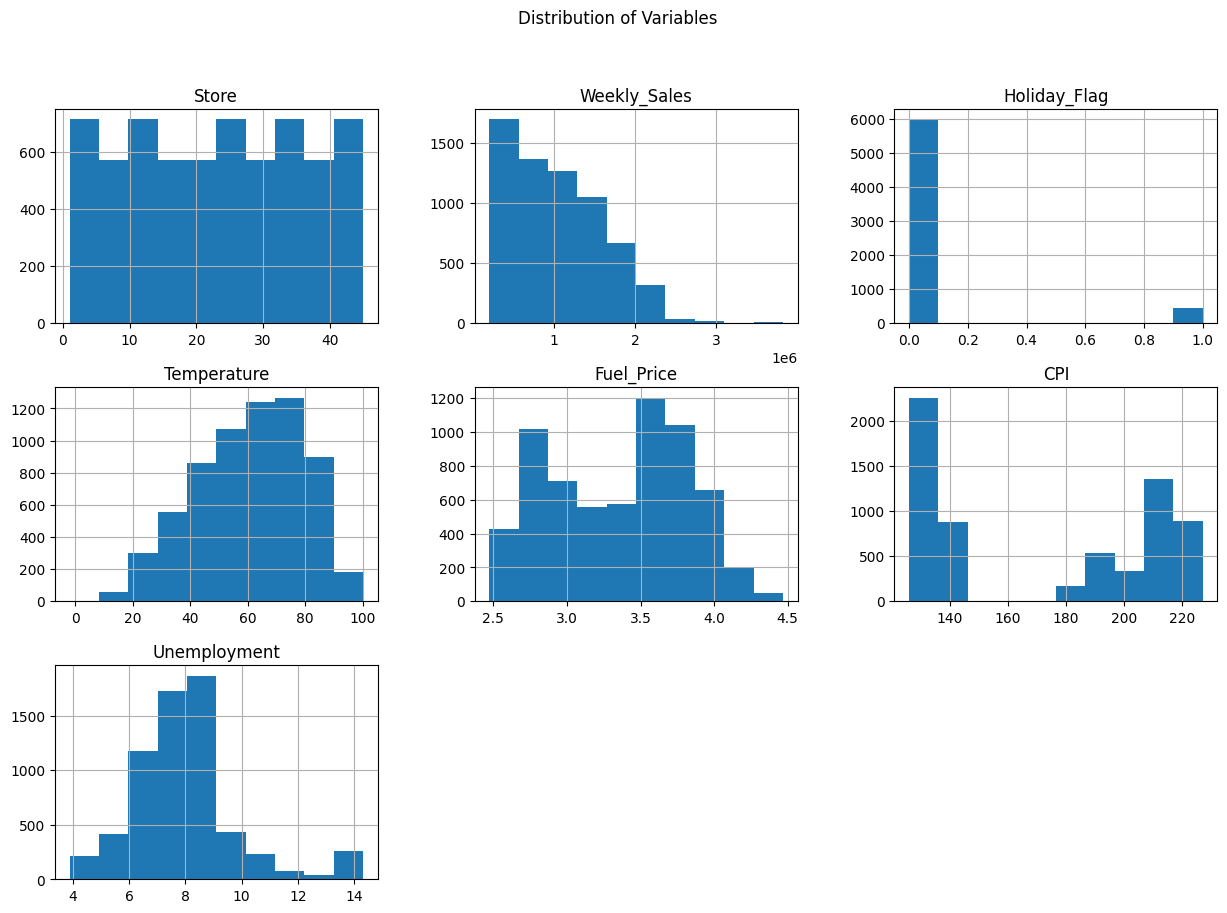

In [40]:
#eda
# Visualization 1: Distribution of each variable (histograms)
walmart_data.hist(bins=10, figsize=(15, 10))
plt.suptitle('Distribution of Variables')
plt.show()

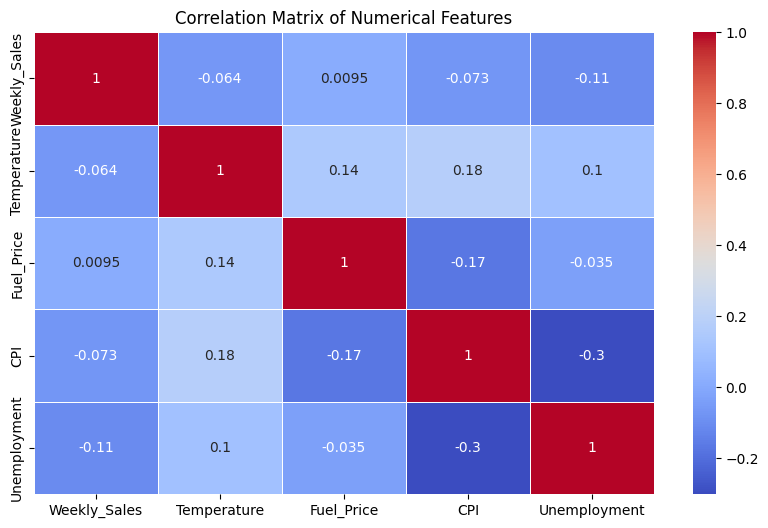

In [41]:
# Correlation Matrix
plt.figure(figsize=(10,6))
corr_matrix = walmart_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Pairplot to visualize relationships between variables
categorical_cols=walmart_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]



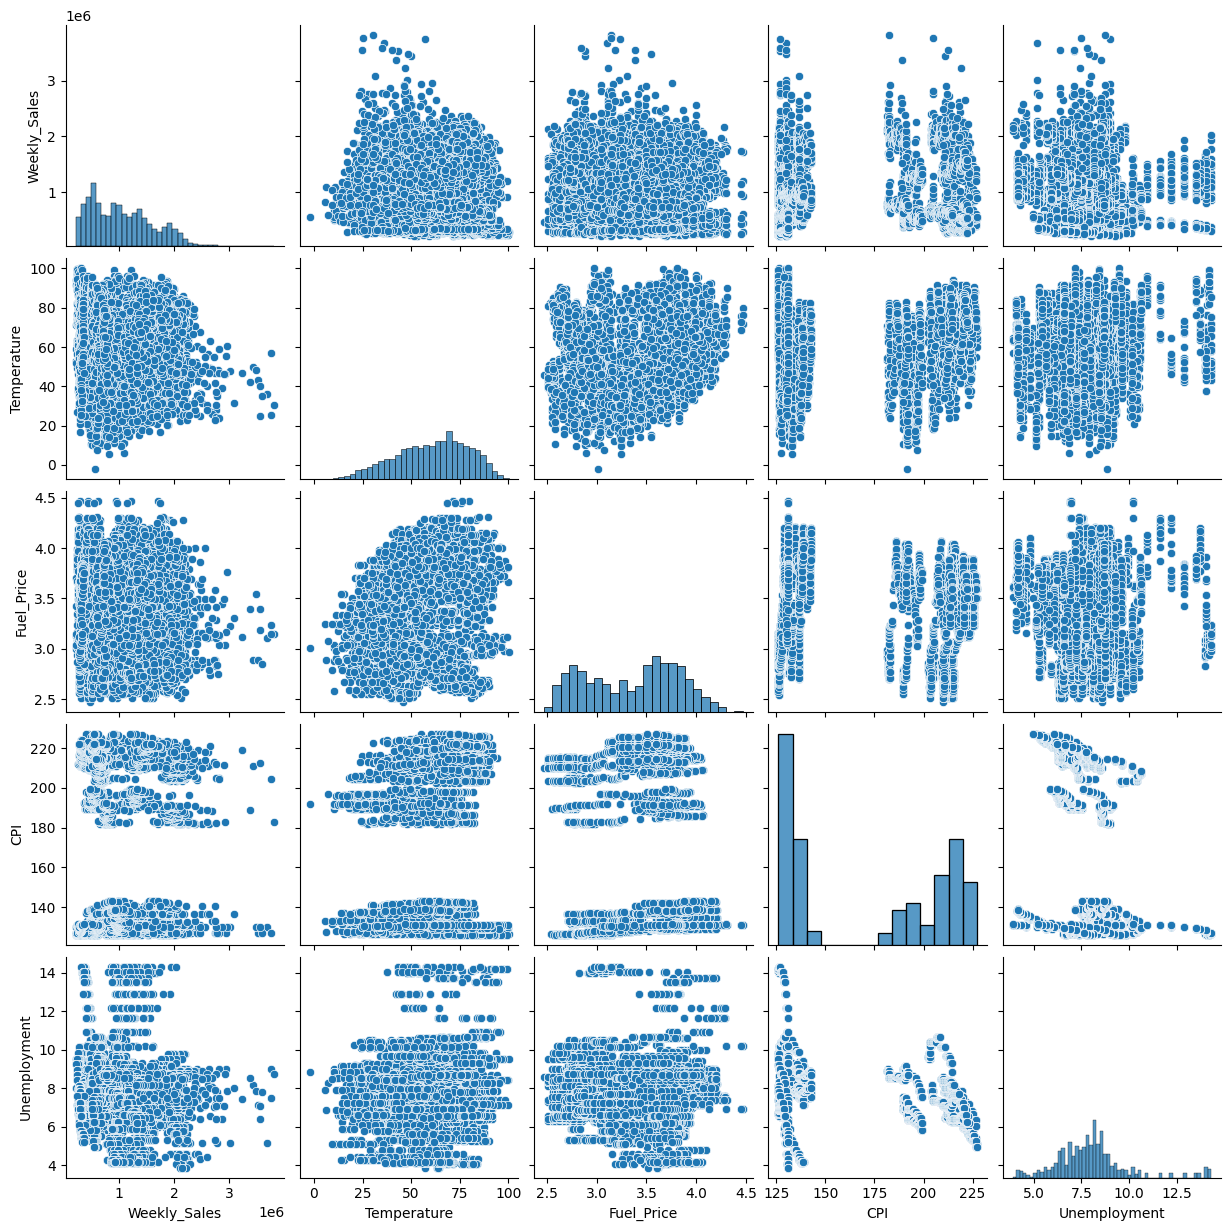

In [42]:

# Pairplot to visualize relationships between variables
sns.pairplot(walmart_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


C:\Users\tarun\AppData\Local\Temp\ipykernel_21036\2592589520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart_data, palette="Set3")


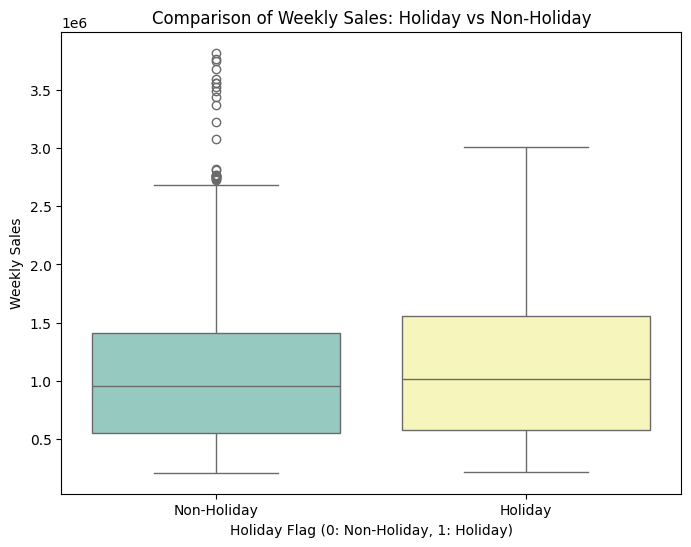

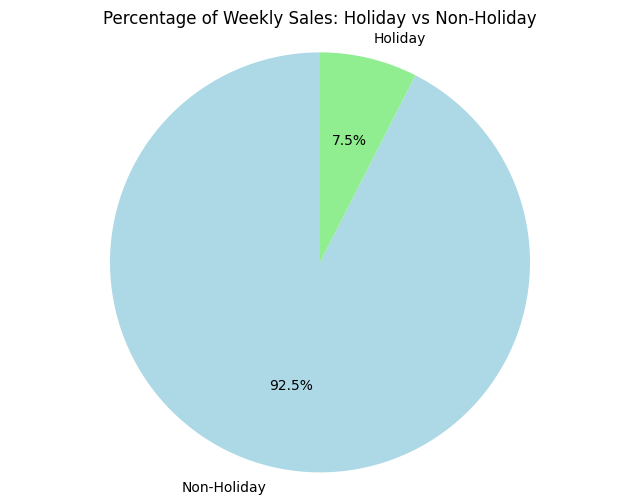

In [43]:
#question 1  How does the Holiday_Flag affect Weekly_Sales?
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart_data, palette="Set3")
plt.title('Comparison of Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Flag (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()
sales_by_holiday = walmart_data.groupby('Holiday_Flag')['Weekly_Sales'].sum()

# Pie chart
plt.figure(figsize=(8,6))
plt.pie(sales_by_holiday, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Percentage of Weekly Sales: Holiday vs Non-Holiday')
plt.axis('equal')  # Ensures that pie is drawn as a circle
plt.show()


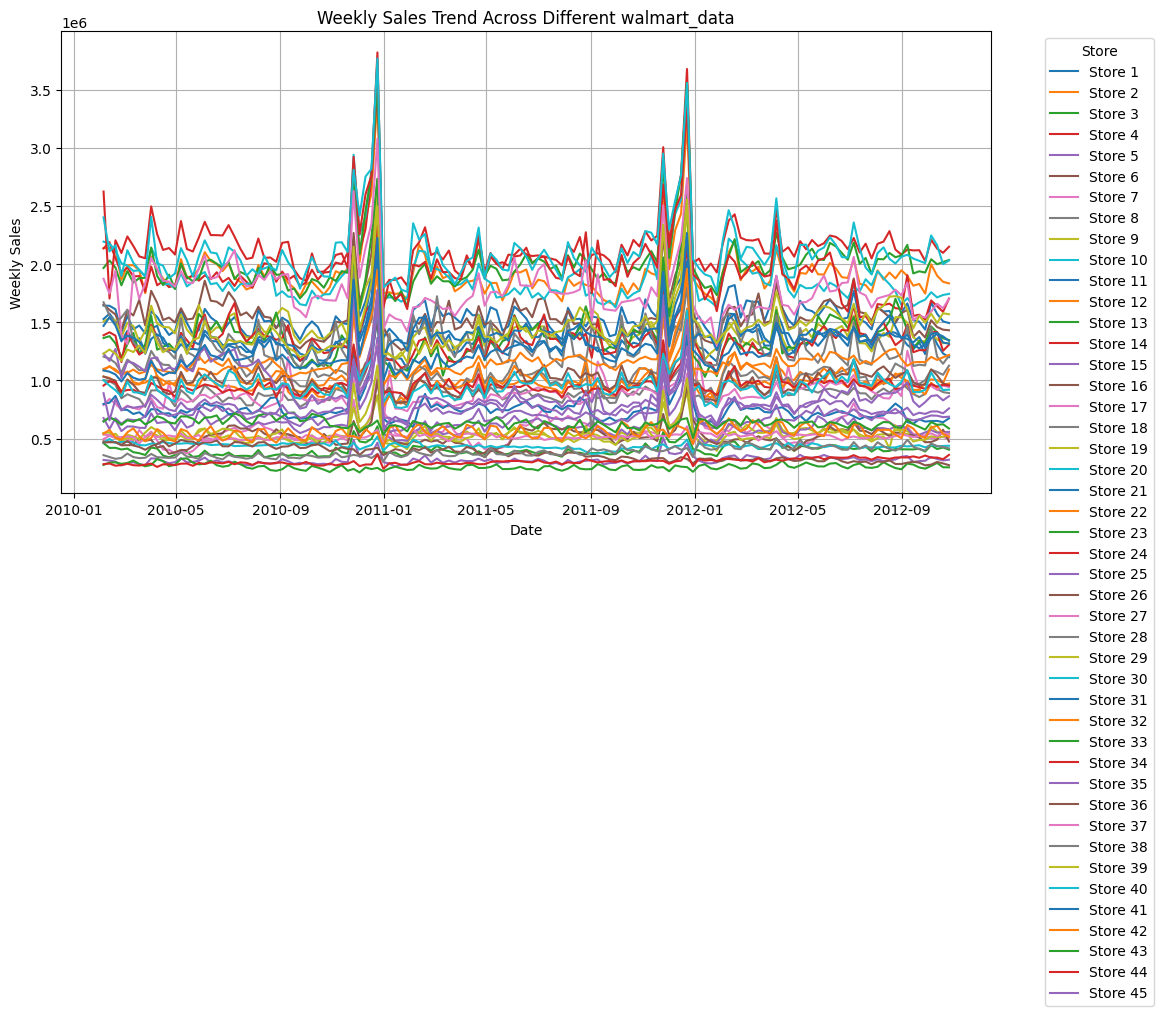

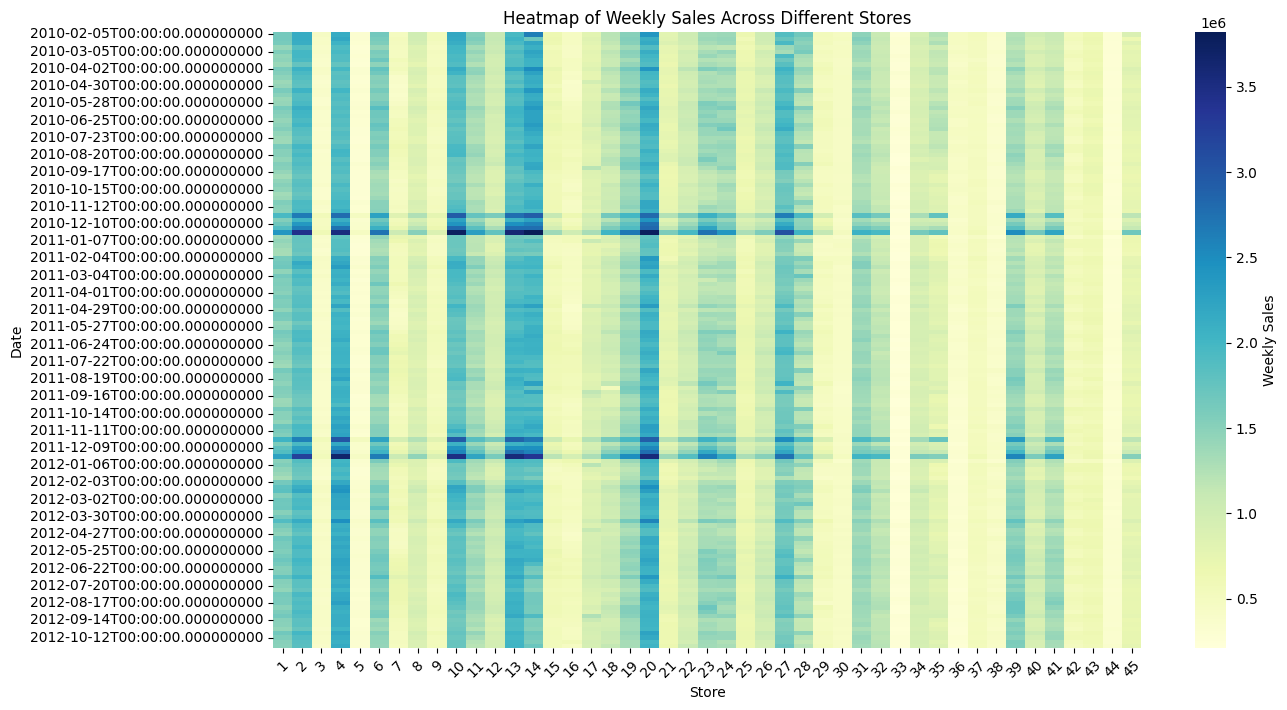

In [44]:
#question 2 What is the trend of Weekly_Sales across different walmart_data over time?
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

# Step 2: Pivot the data to make it easier to plot
sales_over_time = walmart_data.pivot_table(values='Weekly_Sales', index='Date', columns='Store', aggfunc='sum')

# Step 3: Plot the trend of Weekly Sales over time for each store
plt.figure(figsize=(12,6))
for store in sales_over_time.columns:
    plt.plot(sales_over_time.index, sales_over_time[store], label=f'Store {store}')
    
plt.title('Weekly Sales Trend Across Different walmart_data')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Create a pivot table for the heatmap
sales_heatmap = walmart_data.pivot_table(values='Weekly_Sales', index='Date', columns='Store', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(sales_heatmap, cmap='YlGnBu', cbar_kws={'label': 'Weekly Sales'})
plt.title('Heatmap of Weekly Sales Across Different Stores')
plt.xlabel('Store')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

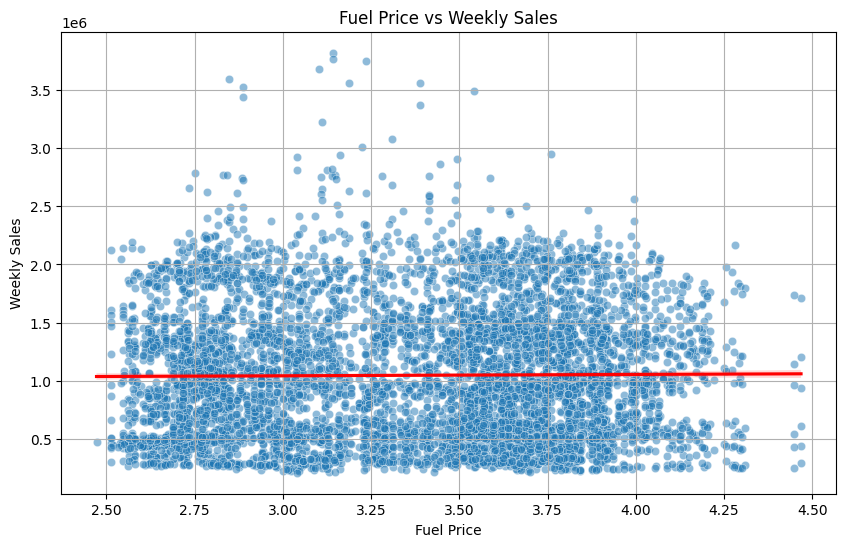

C:\Users\tarun\AppData\Local\Temp\ipykernel_21036\1309779000.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Price_Bin', y='Weekly_Sales', data=walmart_data, palette='Set3')


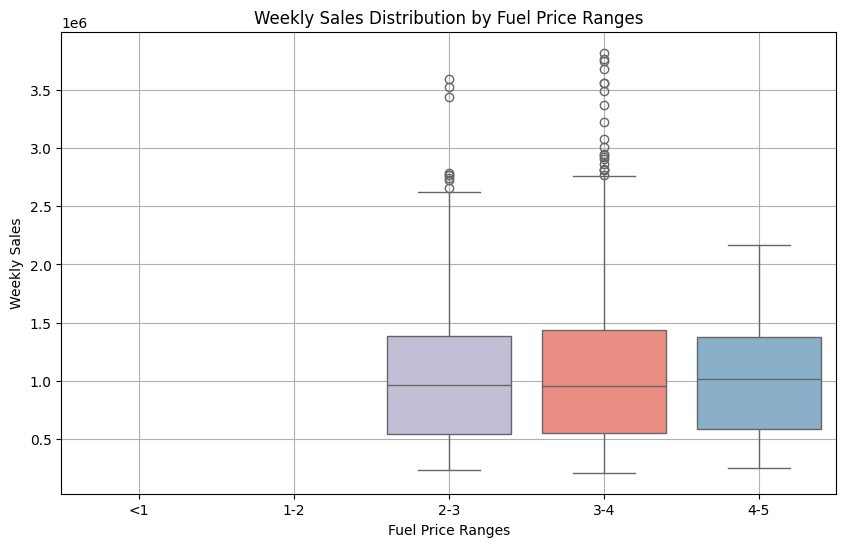

In [45]:
#ques3 How does the Fuel_Price affect Weekly_Sales?
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=walmart_data, alpha=0.5)
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=walmart_data, scatter=False, color='red')  # Adding a regression line
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Create bins for Fuel_Price
bins = [0, 1, 2, 3, 4, 5]  # Adjust these bins based on your data
labels = ['<1', '1-2', '2-3', '3-4', '4-5']
walmart_data['Fuel_Price_Bin'] = pd.cut(walmart_data['Fuel_Price'], bins=bins, labels=labels, right=False)

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Price_Bin', y='Weekly_Sales', data=walmart_data, palette='Set3')
plt.title('Weekly Sales Distribution by Fuel Price Ranges')
plt.xlabel('Fuel Price Ranges')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

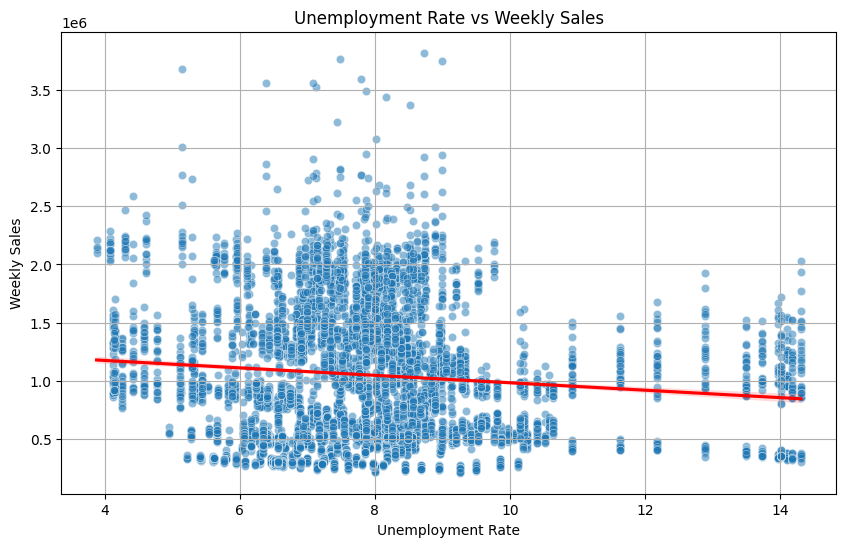

In [46]:
#ques4 What is the impact of Unemployment on Weekly_Sales?

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=walmart_data, alpha=0.5)
sns.regplot(x='Unemployment', y='Weekly_Sales', data=walmart_data, scatter=False, color='red')  # Adding a regression line
plt.title('Unemployment Rate vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Top 10 Performing Stores:
    Store  Weekly_Sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06
12     13  2.003620e+06
1       2  1.925751e+06
9      10  1.899425e+06
26     27  1.775216e+06
5       6  1.564728e+06
0       1  1.555264e+06
38     39  1.450668e+06

Bottom 10 Underperforming Stores:
    Store   Weekly_Sales
28     29  539451.428741
15     16  519247.730070
36     37  518900.281958
29     30  438579.616224
2       3  402704.441049
37     38  385731.653287
35     36  373511.992797
4       5  318011.810490
43     44  302748.866014
32     33  259861.692028


C:\Users\tarun\AppData\Local\Temp\ipykernel_21036\4214309390.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=average_sales, palette='viridis')


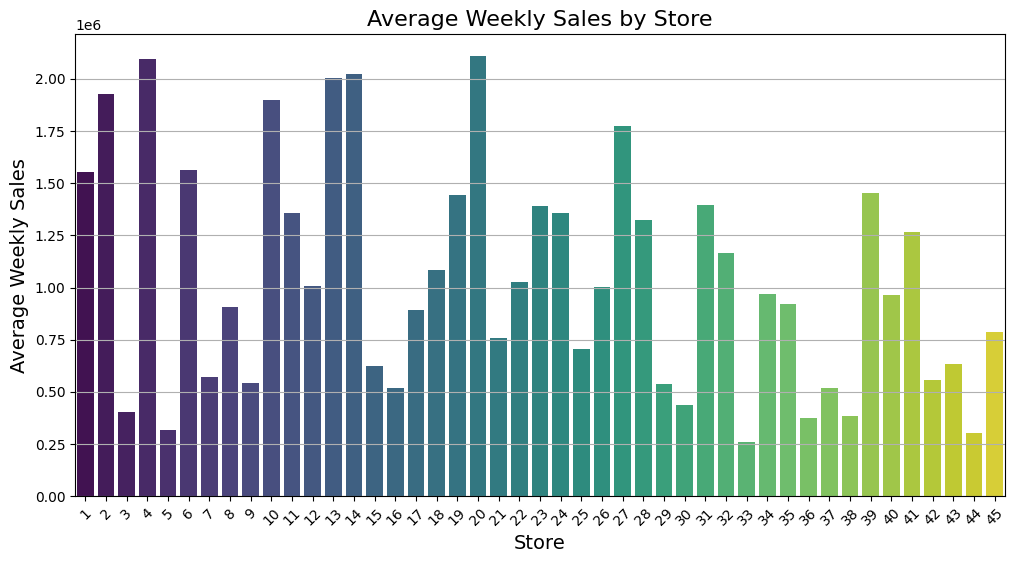

In [47]:
#ques 5 Which stores have the highest and lowest average weekly sales?
# Step 1: Group by Store and calculate average weekly sales
average_sales = walmart_data.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Step 2: Sort the results by average sales
average_sales = average_sales.sort_values(by='Weekly_Sales', ascending=False)

# Step 3: Display the top-performing and underperforming stores
top_stores = average_sales.head(10)  # Top 10 stores
bottom_stores = average_sales.tail(10)  # Bottom 10 stores

# Display results
print("Top 10 Performing Stores:")
print(top_stores)

print("\nBottom 10 Underperforming Stores:")
print(bottom_stores)

# Step 3: Create a bar plot for average weekly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=average_sales, palette='viridis')

# Add title and labels
plt.title('Average Weekly Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Average Weekly Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate store names for better visibility
plt.grid(axis='y')  # Add grid for y-axis
plt.show()

Correlation between Temperature and Weekly Sales: -0.06


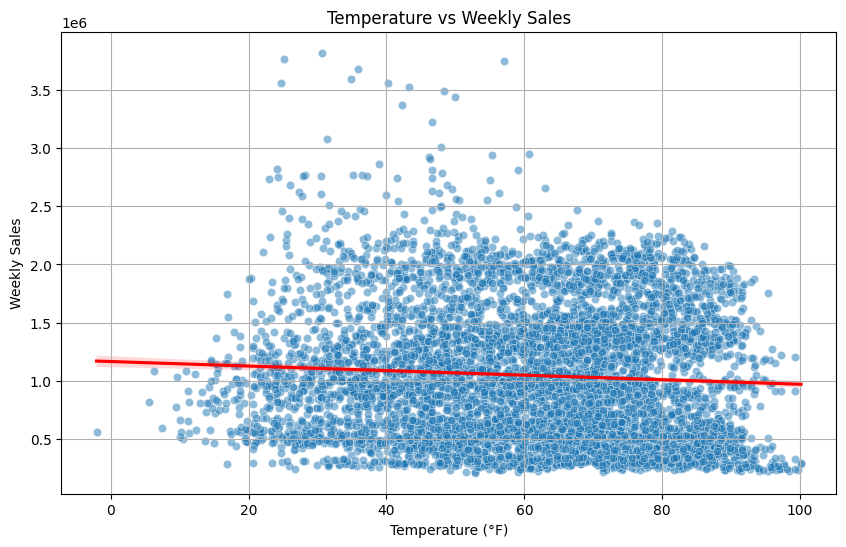

C:\Users\tarun\AppData\Local\Temp\ipykernel_21036\2934316610.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Temperature_Bin', y='Weekly_Sales', data=walmart_data, palette='Set2')


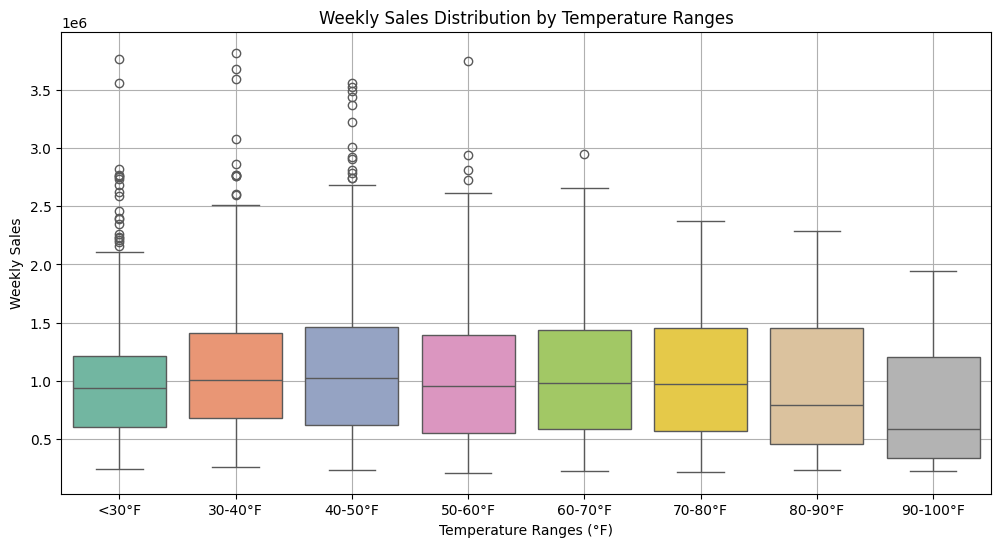

In [48]:
#ques 6 Does Temperature impact Weekly_Sales?
# Calculate correlation
correlation = walmart_data['Temperature'].corr(walmart_data['Weekly_Sales'])
print(f'Correlation between Temperature and Weekly Sales: {correlation:.2f}')
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust these bins based on your data
labels = ['<30°F', '30-40°F', '40-50°F', '50-60°F', '60-70°F', '70-80°F', '80-90°F', '90-100°F']
walmart_data['Temperature_Bin'] = pd.cut(walmart_data['Temperature'], bins=bins, labels=labels, right=False)

# Scatter plot to visualize the relationship between Temperature and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=walmart_data, alpha=0.5)
sns.regplot(x='Temperature', y='Weekly_Sales', data=walmart_data, scatter=False, color='red')  # Adding a regression line
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Temperature_Bin', y='Weekly_Sales', data=walmart_data, palette='Set2')
plt.title('Weekly Sales Distribution by Temperature Ranges')
plt.xlabel('Temperature Ranges (°F)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Correlation between CPI and Weekly Sales: -0.07


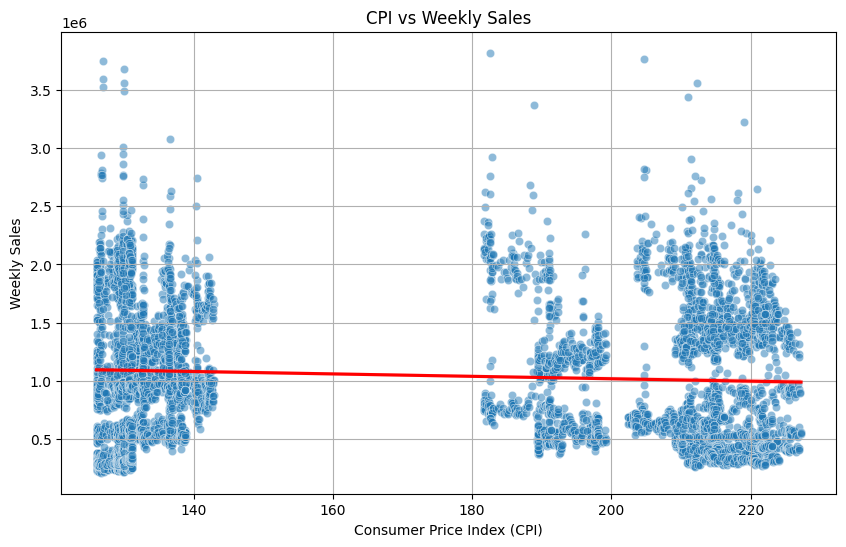

In [49]:
#ques7 How does the CPI (Consumer Price Index) influence Weekly_Sales?

# Calculate correlation
correlation = walmart_data['CPI'].corr(walmart_data['Weekly_Sales'])
print(f'Correlation between CPI and Weekly Sales: {correlation:.2f}')
# Scatter plot to visualize the relationship between CPI and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=walmart_data, alpha=0.5)
sns.regplot(x='CPI', y='Weekly_Sales', data=walmart_data, scatter=False, color='red')  # Adding a regression line
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()




In [50]:
heart_corr = corr_matrix['Weekly_Sales'].sort_values(ascending=False)

print("Correlation of each feature with Weekly Sales:\n", heart_corr)

Correlation of each feature with Weekly Sales:
 Weekly_Sales    1.000000
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64
